In [1]:
!pip install kaggle


  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for kaggle: filename=kaggle-1.5.12-py3-none-any.whl size=73051 sha256=5aee00791ae9c7684ab12c8a8c3d352d297ecca6691d260f295d8331b7130f57
  Stored in directory: c:\users\black\appdata\local\pip\cache\wheels\ac\b2\c3\fa4706d469b5879105991d1c8be9a3c2ef329ba9fe2ce5085e
Successfully built kaggle


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings(action='ignore')

In [ ]:
!kaggle competitions list

In [ ]:
!kaggle datasets download "fedesoriano/stroke-prediction-dataset"

In [ ]:
!unzip stroke-prediction-dataset

In [220]:
stroke_df = pd.read_csv("healthcare-dataset-stroke-data.csv")


In [221]:
stroke_df.head(3)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1


In [222]:
stroke_df.shape

(5110, 12)

In [223]:
stroke_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [224]:
stroke_df.isna().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [225]:
stroke_df.bmi= stroke_df.bmi.fillna(stroke_df.bmi.mean())

In [226]:
stroke_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                5110 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [227]:
stroke_df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,5110.0,36517.829354,21161.721625,67.00,17741.250,36932.000,54682.00,72940.00
age,5110.0,43.226614,22.612647,0.08,25.000,45.000,61.00,82.00
hypertension,5110.0,0.097456,0.296607,0.00,0.000,0.000,0.00,1.00
heart_disease,5110.0,0.054012,0.226063,0.00,0.000,0.000,0.00,1.00
avg_glucose_level,5110.0,106.147677,45.283560,55.12,77.245,91.885,114.09,271.74
bmi,5110.0,28.893237,7.698018,10.30,23.800,28.400,32.80,97.60
stroke,5110.0,0.048728,0.215320,0.00,0.000,0.000,0.00,1.00


In [228]:
stroke_df.id.nunique()

5110

In [229]:
stroke_df.shape

(5110, 12)

In [230]:
stroke_df= stroke_df.drop(columns="id")

In [231]:
stroke_df.shape

(5110, 11)

In [232]:
stroke_df.gender.value_counts()

Female    2994
Male      2115
Other        1
Name: gender, dtype: int64

In [233]:
stroke_df.gender= stroke_df.gender.replace('Other',stroke_df.gender.mode()[0])

In [234]:
stroke_df.gender.value_counts()

Female    2995
Male      2115
Name: gender, dtype: int64

In [235]:
stroke_df.columns

Index(['gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

In [236]:
stroke_df_cat= ['gender', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type','smoking_status', 'stroke']

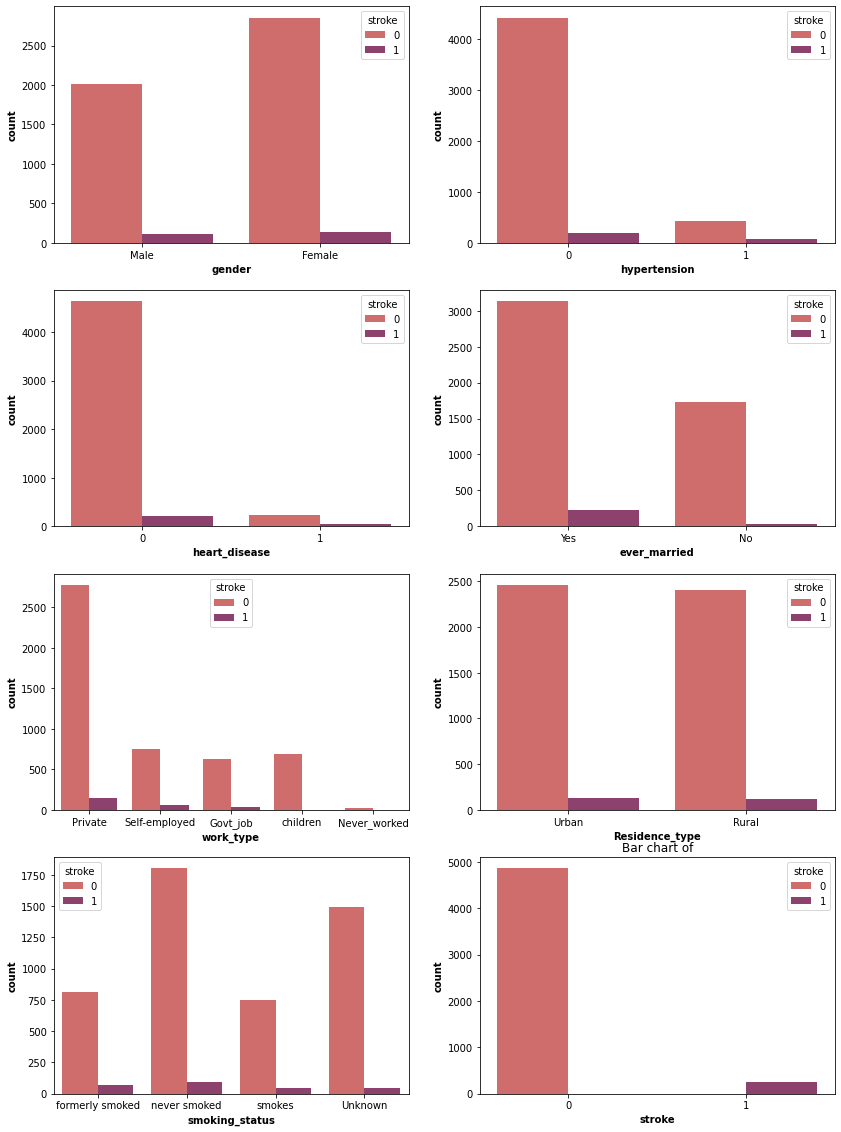

In [237]:
fig , axs= plt.subplots(4,2, figsize=(14,20))
axs= axs.flatten()

for i , colm_name in enumerate(stroke_df_cat):
  sns.countplot(x= colm_name, data= stroke_df, ax= axs[i], hue= stroke_df.stroke,
                palette= 'flare')
  plt.title("Bar chart of")
  axs[i].set_xlabel(f'{colm_name}', weight= 'bold')
  axs[i].set_ylabel("count", weight= 'bold')

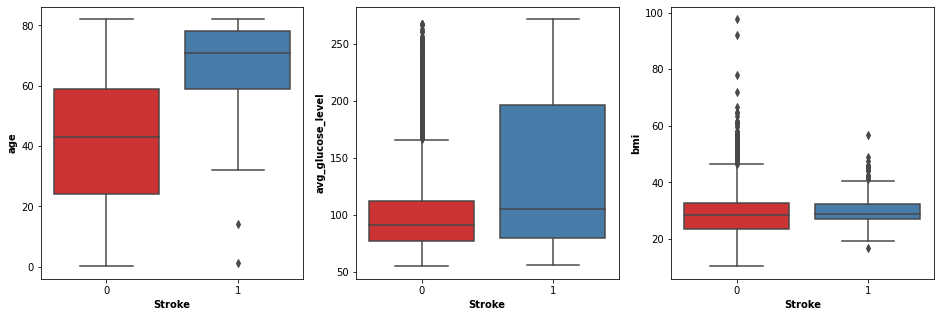

In [238]:
stroke_df_num= ['age' , 'avg_glucose_level', 'bmi']

fig , axs= plt.subplots(1,3, figsize= (16,5))
axs= axs.flatten()

for i ,colm_name in enumerate(stroke_df_num):
  sns.boxplot(x= "stroke", y= colm_name, data= stroke_df, ax= axs[i], palette='Set1')
  axs[i].set_xlabel("Stroke", weight= 'bold')
  axs[i].set_ylabel(f"{colm_name}", weight= 'bold')

In [239]:
bmi_outliers= stroke_df.loc[stroke_df.bmi > 50]
bmi_outliers.bmi.shape

(79,)

In [240]:
stroke_df.bmi= pd.to_numeric(stroke_df.bmi)
stroke_df.bmi= stroke_df.bmi.apply(lambda x :50 if x > 50 else x)

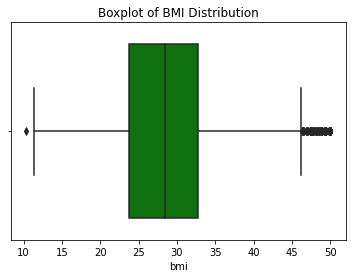

In [241]:
sns.boxplot(data= stroke_df, x= stroke_df.bmi, color= 'green')
plt.title("Boxplot of BMI Distribution");

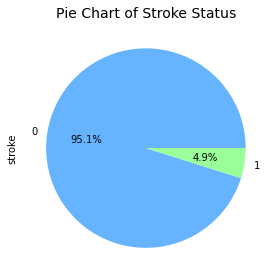

In [242]:
plt.figure(figsize= (4,4))
stroke_df.stroke.value_counts().plot.pie(autopct= '%1.1f%%', colors= ['#66b3ff','#99ff99'])
plt.title("Pie Chart of Stroke Status", fontdict={'fontsize': 14})
plt.tight_layout()

In [243]:
stroke_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5110 non-null   object 
 1   age                5110 non-null   float64
 2   hypertension       5110 non-null   int64  
 3   heart_disease      5110 non-null   int64  
 4   ever_married       5110 non-null   object 
 5   work_type          5110 non-null   object 
 6   Residence_type     5110 non-null   object 
 7   avg_glucose_level  5110 non-null   float64
 8   bmi                5110 non-null   float64
 9   smoking_status     5110 non-null   object 
 10  stroke             5110 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 439.3+ KB


In [244]:
stroke_df.head(3)

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.600000,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.893237,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.500000,never smoked,1


In [245]:
stroke_df['avg_glucose_level'] = np.log(stroke_df['avg_glucose_level'])

In [247]:
stroke_df.tail()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
5105,Female,80.0,1,0,Yes,Private,Urban,4.427836,28.893237,never smoked,0
5106,Female,81.0,0,0,Yes,Self-employed,Urban,4.829912,40.000000,never smoked,0
5107,Female,35.0,0,0,Yes,Self-employed,Rural,4.418720,30.600000,never smoked,0
5108,Male,51.0,0,0,Yes,Private,Rural,5.113733,25.600000,formerly smoked,0
5109,Female,44.0,0,0,Yes,Govt_job,Urban,4.445940,26.200000,Unknown,0


In [199]:
 from sklearn.preprocessing import LabelEncoder

le= LabelEncoder()

stroke_df.gender= le.fit_transform(stroke_df.gender)
stroke_df.ever_married= le.fit_transform(stroke_df.ever_married)
stroke_df.work_type= le.fit_transform(stroke_df.work_type)
stroke_df.Residence_type= le.fit_transform(stroke_df.Residence_type)
stroke_df.smoking_status= le.fit_transform(stroke_df.smoking_status)

stroke_df_encode= stroke_df
stroke_df_encode.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,67.0,0,1,1,2,1,5.432367,36.600000,1,1
1,0,61.0,0,0,1,3,0,5.309307,28.893237,2,1
2,1,80.0,0,1,1,2,0,4.662684,32.500000,2,1
3,0,49.0,0,0,1,2,1,5.143008,34.400000,3,1
4,0,79.0,1,0,1,3,0,5.159745,24.000000,2,1


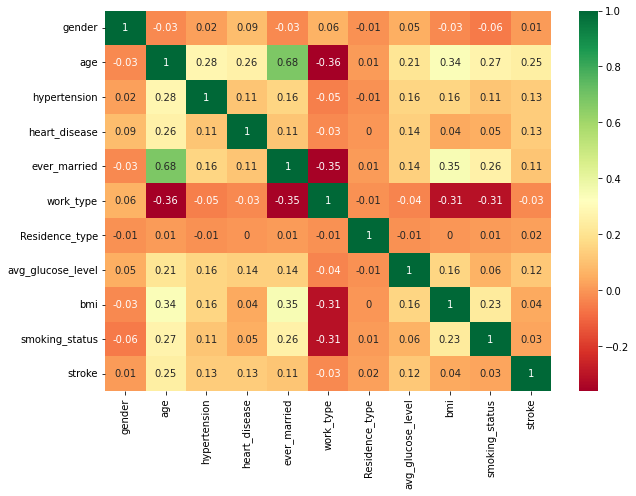

In [200]:
corr= stroke_df_encode.corr().round(2)
plt.figure(figsize= (10,7))
sns.heatmap(corr, annot= True, cmap= 'RdYlGn');

In [119]:
stroke_df_encode= stroke_df_encode.drop(['ever_married'], axis=1)
stroke_df_encode.head(3)

,gender,age,hypertension,heart_disease,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,67.0,0,1,2,1,5.432367,36.600000,1,1
1,0,61.0,0,0,3,0,5.309307,28.893237,2,1
2,1,80.0,0,1,2,0,4.662684,32.500000,2,1


In [47]:
from sklearn.preprocessing import StandardScaler
s= StandardScaler()

columns= ['avg_glucose_level', 'bmi', 'age']

stand_scale= s.fit_transform(stroke_df_encode[['avg_glucose_level','bmi','age']])
stand_scale= pd.DataFrame(stand_scale, columns= columns)

stroke_df_encode= stroke_df_encode.drop(columns=columns, axis=1)

stand_scale.head()

KeyError: "None of [Index(['avg_glucose_level', 'bmi', 'age'], dtype='object')] are in the [columns]"

In [89]:
f_stroke_df= pd.concat([stroke_df_encode, stand_scale], axis= 1)
f_stroke_df.head(3)

,gender,age,hypertension,heart_disease,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,avg_glucose_level,bmi,age
0,1,67.0,0,1,2,1,5.432367,36.600000,1,1,2.320494,1.066746,1.051434
1,0,61.0,0,0,3,0,5.309307,28.893237,2,1,1.980500,0.013363,0.786070
2,1,80.0,0,1,2,0,4.662684,32.500000,2,1,0.194001,0.506346,1.626390


In [201]:
x= stroke_df.drop(['stroke'], axis= 1)
y= stroke_df['stroke']

In [202]:
x

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
0,1,67.0,0,1,1,2,1,5.432367,36.600000,1
1,0,61.0,0,0,1,3,0,5.309307,28.893237,2
2,1,80.0,0,1,1,2,0,4.662684,32.500000,2
3,0,49.0,0,0,1,2,1,5.143008,34.400000,3
4,0,79.0,1,0,1,3,0,5.159745,24.000000,2
...,...,...,...,...,...,...,...,...,...,...
5105,0,80.0,1,0,1,2,1,4.427836,28.893237,2
5106,0,81.0,0,0,1,3,1,4.829912,40.000000,2
5107,0,35.0,0,0,1,3,0,4.418720,30.600000,2
5108,1,51.0,0,0,1,2,0,5.113733,25.600000,1


In [203]:
x.shape

(5110, 10)

In [204]:
y.shape

(5110,)

In [206]:
stroke_df['stroke'].value_counts()

0    4861
1     249
Name: stroke, dtype: int64

In [209]:
from imblearn.over_sampling import SMOTE
x, y = smote.fit_resample(x, y)

ModuleNotFoundError: No module named 'imblearn'

In [210]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
import pickle

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=0)

In [212]:
model= LogisticRegression()

In [213]:
model.fit(x_train, y_train)
#predit= model.predict(x_test)
#arg_test = {'y_true':y_test, 'y_pred':predit}
#print(confusion_matrix(**arg_test))
#print(classification_report(**arg_test))

LogisticRegression()

In [216]:
model.score(x_train, y_train)

0.9522994129158513

In [217]:
predit= model.predict(x_test)
print(predit)

[0 0 0 ... 0 0 0]


In [219]:
pickle.dump(model, open('model.pkl','wb'))
